#  Rainfall Weather Forecasting

## Project Description

   <b> Weather forecasting</b> is the application of science and technology to predict the <b>conditions of the atmosphere</b> for a given <b>location</b> and <b>time</b>. <b>Weather forecasts</b> are made by collecting <b>quantitative data</b> about the <b>current state of the atmosphere</b> at a given place and using meteorology to project how the atmosphere will change.

   Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. <b>Here, predict two things:</b>


<b>1. Problem Statement:</b>
    
 a)Design a predictive model with the use of machine learning algorithms to forecast **whether or not it will rain tomorrow.**
 
 b)Design a predictive model with the use of machine learning algorithms to **predict how much rainfall could be there.**


**Dataset Description:**
Number of columns: 23


## Independent Variables
1.	<b>Date</b>: The date of observation
2.	<b>Location</b>: The common name of the location of the weather station
3.	<b>MinTemp</b>: The minimum temperature in degrees celsius
4.	<b>MaxTemp</b>: The maximum temperature in degrees celsius
5.	<b>Rainfall</b>: The amount of rainfall recorded for the day in mm
6.	<b>Evaporation</b>: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
7.	<b>Sunshine</b>: The number of hours of bright sunshine in the day.
8.	<b>WindGustDir</b>: The direction of the strongest wind gust in the 24 hours to midnight
9.	<b>WindGustSpeed</b>:The speed (km/h) of the strongest wind gust in the 24 hours to midnight
10.	<b>WindDir9am</b>: Direction of the wind at 9am
11.	<b>WindDir3pm</b>: Direction of the wind at 3pm
12.	<b>WindSpeed9am</b>: Wind speed (km/hr) averaged over 10 minutes prior to 9am
13.	<b>WindSpeed3pm</b>: Wind speed (km/hr) averaged over 10 minutes prior to 3pm
14.	<b>Humidity9am</b>: Humidity (percent) at 9am
15.	<b>Humidity3pm</b>: Humidity (percent) at 3pm
16.	<b>Pressure9am</b>: Atmospheric pressure (hpa) reduced to mean sea level at 9am
17.	<b>Pressure3pm</b>: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
18.	<b>Cloud9am</b>: Fraction of sky obscured by cloud at 9am. 
19.	<b>Cloud3pm</b>: Fraction of sky obscured by cloud at 3pm. 
20.	<b>Temp9am</b>: Temperature (degrees C) at 9am
21.	<b>Temp3pm</b>: Temperature (degrees C) at 3pm
22.	<b>RainToday -Boolean</b>: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

## Dependent Variable
23.	<b>RainTomorrow</b>: The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

## 1.**Context And Attribute Information**

### Context

This dataset contains 10 years of daily weather observations from many locations across Australia.

There are 23 features  in this dataset, including the target variable "RainTomorrow". 

Tomorrow's rain is the target variable for forecasting. This means - did it rain the next day, yes or no? 

This column indicates "Yes" if the amount of precipitation on that day was 1 mm or more. 

In this project, I will use the available data to predict whether it will rain the next day or not.

## 2.Import

## Let's Import majorly required Libraries and Later import based on requirements

In [1]:
# All the libraries used in this project
import numpy as np
import pandas as pd
import seaborn as sns           
import matplotlib                
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report   

## 3.Exploratory Data Analysis (EDA) & Visualization

In [2]:
# let's download the data and take a look at it
rainfall = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
rainfall.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
# let's output five random strings
rainfall.sample(5)

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
6532  2012-03-08      Brisbane     18.3     29.0       0.0          7.0   
3183  2016-10-15   Williamtown      5.5     24.7       0.2          NaN   
2479  2014-10-06       Penrith     16.4     33.8       0.0          NaN   
6677  2012-07-31      Brisbane      8.5     21.4       0.0          3.6   
7804  2013-07-16  PerthAirport     11.9     18.0      10.4          2.6   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
6532       9.6           E           20.0        SSW  ...        63.0   
3183       NaN           E           31.0         NW  ...        77.0   
2479       NaN          NE           31.0          N  ...        68.0   
6677      10.0          SW           22.0        SSW  ...        54.0   
7804       2.2          SW           78.0          N  ...        97.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
6532         62.0       1011.5       1007.8       4.0       4.0     24.2   
3183         23.0       1023.7       1018.7       NaN       NaN     14.5   
2479         36.0          NaN          NaN       NaN       NaN     18.6   
6677         36.0       1023.3       1019.1       1.0       2.0     14.4   
7804         67.0       1011.3       1006.5       7.0       4.0     13.7   

      Temp3pm  RainToday  RainTomorrow  
6532     26.6         No            No  
3183     23.9         No            No  
2479     30.3         No            No  
6677     21.2         No            No  
7804     15.5        Yes           Yes  

[5 rows x 23 columns]

In [4]:
rainfall.shape

(8425, 23)

In [5]:
# The .info() method for each column outputs the number of non-empty (not-null) values and the data type
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
# method .isnull() outputs a logical array where the omissions are indicated as True
# the .sum() method by default sums these True or units by columns (axis = 0)
rainfall.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [7]:
rainfall.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        50.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7116.000000  7113.000000  6004.000000  5970.000000  8369.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.828699     6.766681     2.877658     2.731659     5.627035   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.000000  1010.400000     1.000000     2.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.800000   
75%    1022.300000  1019.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8329.000000  
mean     22.442934  
std       5.980020  
min       7.300000  
25%      18.000000  
50%      21.900000  
75%      26.400000  
max      44.100000

### Let's try to visualize our data

In [8]:
# For example, let's show the distribution of RainTomorrow depending on the localization
fig=px.histogram(rainfall, 
                 x="RainTomorrow",
                 color="Location",
                 hover_data=rainfall.columns,
                 title="Distribution of RainTomorrow Distribution by Location",
                 barmode="group",
                )
fig.show()

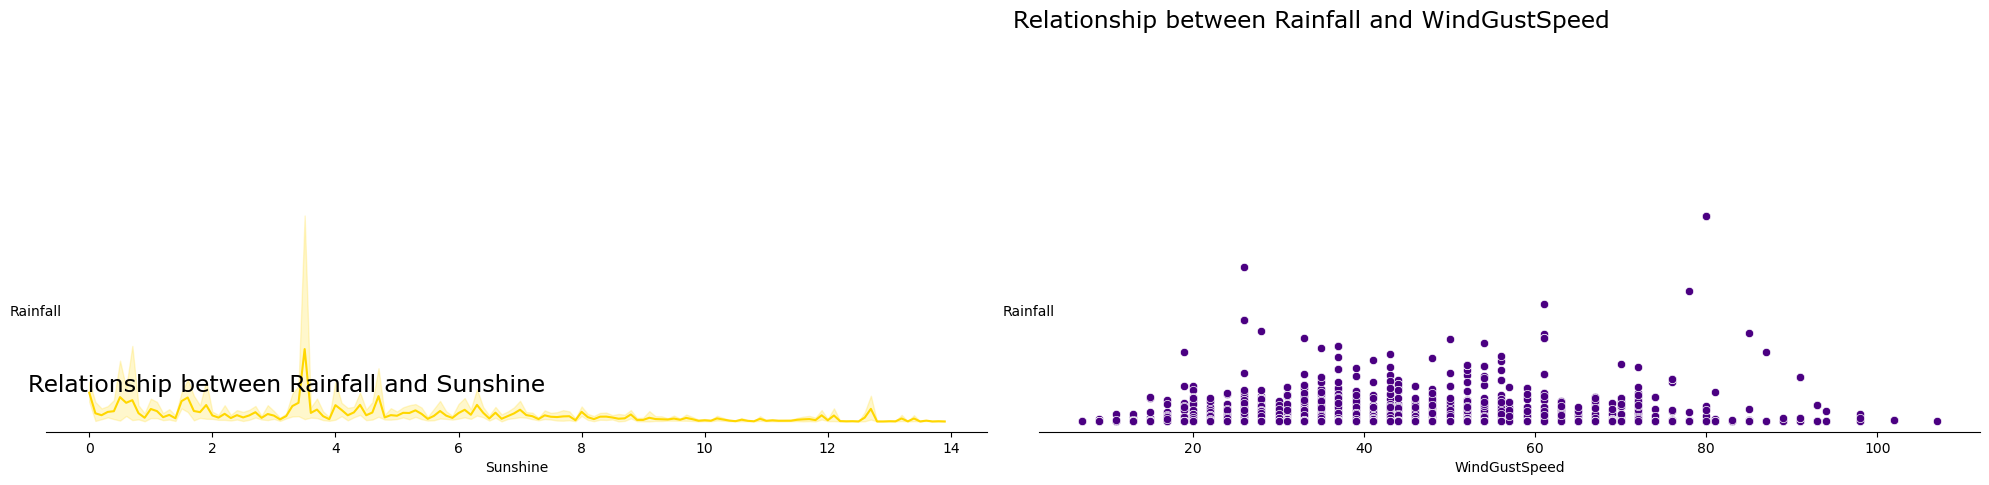

In [9]:
# Let's look at the relationship between two continuous variables

fig=plt.figure(figsize=(20,8),facecolor='white')

gs=fig.add_gridspec(1,2)

ax=[_ for _ in range(2)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-1,15,"Relationship between Rainfall and Sunshine",fontsize=17,fontweight='normal', fontfamily='Verdana')

ax[1].text(-1,430,"Relationship between Rainfall and WindGustSpeed",fontsize=17,fontweight='normal', fontfamily='Verdana')

sns.lineplot(data=rainfall,x='Sunshine',y='Rainfall',ax=ax[0],color='#FFD700')
sns.scatterplot(data=rainfall,x='WindGustSpeed',y='Rainfall',ax=ax[1],color='#4B0082')

for i in range(2):
    
    ax[i].set_ylabel('Rainfall').set_rotation(0)
    ax[i].set_yticklabels('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)
        
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

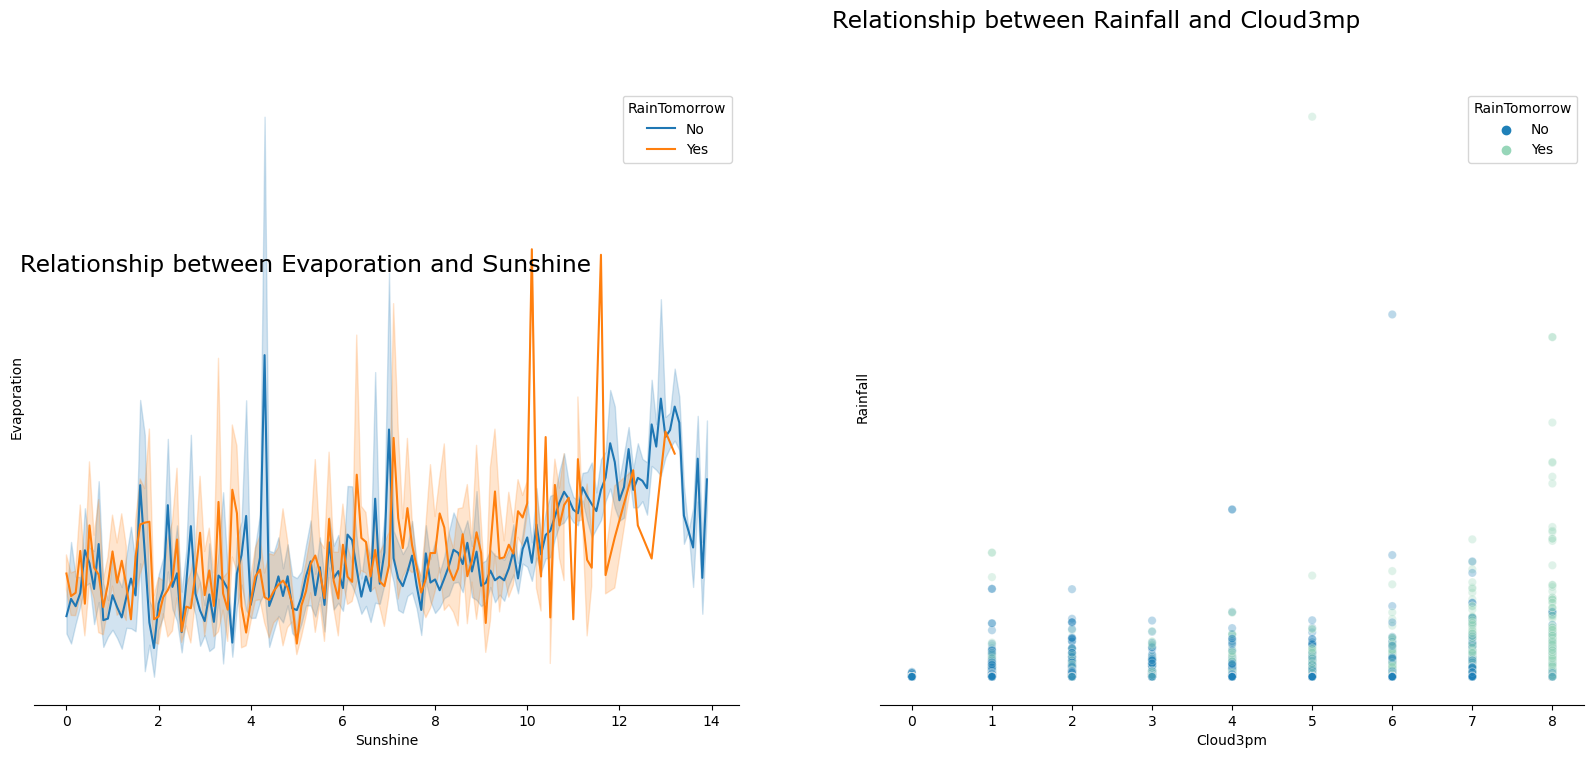

In [10]:
fig=plt.figure(figsize=(20,8),facecolor='white')

gs=fig.add_gridspec(1,2)

ax=[_ for i in range(2)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-1,15,"Relationship between Evaporation and Sunshine",fontsize=17,fontweight='normal', fontfamily='Verdana')

ax[1].text(-1,430,"Relationship between Rainfall and Cloud3mp",fontsize=17,fontweight='normal', fontfamily='Verdana')


for i in range(2):
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ["top","right", 'left']:
        ax[i].spines[direction].set_visible(False)

sns.lineplot(data=rainfall,x='Sunshine',y='Evaporation',ax=ax[0],hue='RainTomorrow')
sns.scatterplot(data=rainfall,x='Cloud3pm',y='Rainfall',hue='RainTomorrow',ax=ax[1],palette='YlGnBu_r',markers='o',alpha=0.3)

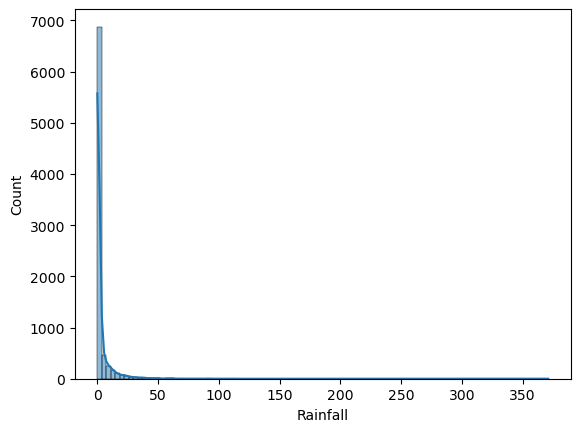

In [11]:
# Let's see how the Rainfall feature is distributed across 100 bins
sns.histplot(data = rainfall, x = 'Rainfall', bins = 100, kde = True);

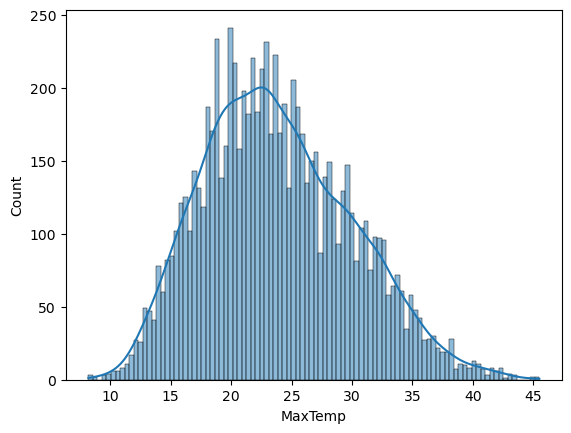

In [12]:
# Let's see how the MaxTemp feature is distributed across 100 bins
sns.histplot(data = rainfall, x = 'MaxTemp', bins = 100, kde = True);

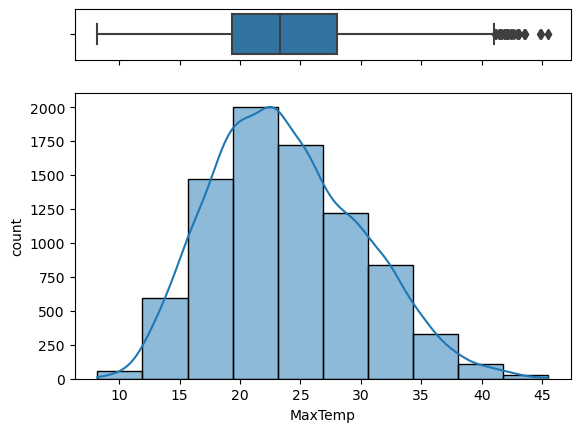

In [13]:
# Let's create a histogram, a boxplot and a density graph for Max Temp
fig, (ax_box, ax_hist) = plt.subplots(2, 
                                    sharex = True, 
                                    gridspec_kw = {'height_ratios': (.15, .85)}) 
 
sns.boxplot(x = rainfall['MaxTemp'], ax = ax_box)
sns.histplot(x = rainfall['MaxTemp'], ax = ax_hist, bins = 10, kde = True)
 
ax_box.set(xlabel = '') 
ax_hist.set(xlabel = 'MaxTemp')
ax_hist.set(ylabel = 'count')
 
plt.show()

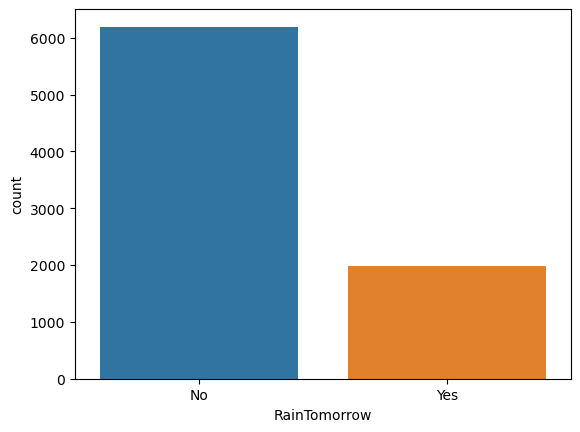

In [14]:
# the count plot() function itself will count the number of observations in each of the categories
sns.countplot(x = 'RainTomorrow', data = rainfall);

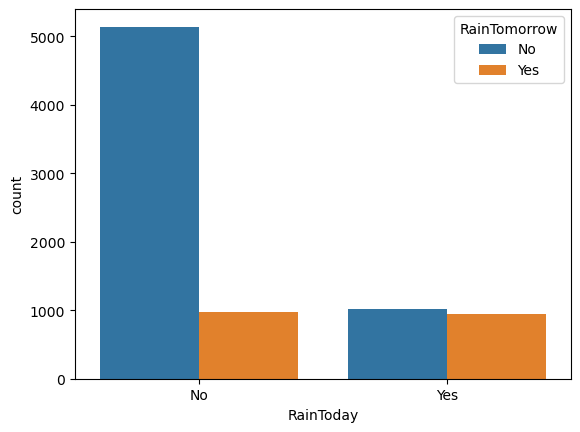

In [15]:
# Let's look at the dependence of whether it will rain tomorrow on whether it rained today
sns.countplot(x = 'RainToday', hue = 'RainTomorrow', data = rainfall);

## 4.Data Cleaning and Feature Engineering

#### Missing values in categorical attributes 

In [16]:
# Get list of categorical variables
s = (rainfall.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [17]:
# Missing values in categorical variables

for i in object_cols:
    print(i, rainfall[i].isnull().sum())

Date 0
Location 0
WindGustDir 991
WindDir9am 829
WindDir3pm 308
RainToday 240
RainTomorrow 239


In [18]:
# Filling missing values with mode of the column in value

for i in object_cols:
    rainfall[i].fillna(rainfall[i].mode()[0], inplace=True)

In [19]:
rainfall.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [20]:
# Let's convert  "Rain Today" and "RainTomorrow" into binary (1/0) for your convenience
rainfall['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
rainfall['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
rainfall.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8          0   
1       1010.6       1007.8       NaN       NaN     17.2     24.3          0   
2       1007.6       1008.7       NaN       2.0     21.0     23.2          0   
3       1017.6       1012.8       NaN       NaN     18.1     26.5          0   
4       1010.8       1006.0       7.0       8.0     17.8     29.7          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 23 columns]

#### Missing values in numeric attributes 

In [21]:
# Get list of neumeric variables
t = (rainfall.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [22]:
# Missing values in numeric variables

for i in num_cols:
    print(i, rainfall[i].isnull().sum())

MinTemp 75
MaxTemp 60
Rainfall 240
Evaporation 3512
Sunshine 3994
WindGustSpeed 991
WindSpeed9am 76
WindSpeed3pm 107
Humidity9am 59
Humidity3pm 102
Pressure9am 1309
Pressure3pm 1312
Cloud9am 2421
Cloud3pm 2455
Temp9am 56
Temp3pm 96


In [23]:
# Filling missing values with median of the column in value

for i in num_cols:
    rainfall[i].fillna(rainfall[i].median(), inplace=True)

In [24]:
rainfall.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          4.6       8.7   
1  2008-12-02   Albury      7.4     25.1       0.0          4.6       8.7   
2  2008-12-03   Albury     12.9     25.7       0.0          4.6       8.7   
3  2008-12-04   Albury      9.2     28.0       0.0          4.6       8.7   
4  2008-12-05   Albury     17.5     32.3       1.0          4.6       8.7   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       5.0     16.9     21.8          0   
1       1010.6       1007.8       5.0       5.0     17.2     24.3          0   
2       1007.6       1008.7       5.0       2.0     21.0     23.2          0   
3       1017.6       1012.8       5.0       5.0     18.1     26.5          0   
4       1010.8       1006.0       7.0       8.0     17.8     29.7          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 23 columns]

In [25]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   object 
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   object 
 10  WindDir3pm     8425 non-null   object 
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

In [26]:
# Let's make sure if there are missing in our data now
rainfall.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [27]:
# Let's discuss categorical variables
cat_cols=rainfall.select_dtypes(include='object').columns.to_list()
print(cat_cols)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [28]:
# let's pass to the columns parameter the column that we want to delete
# let's delete the Date column, as we will not use it further in this project
rainfall.drop(columns = ['Date'], inplace = True)
rainfall.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [29]:
# Let's discuss categorical variables again: the amount of categorical data has decreased
cat_cols=rainfall.select_dtypes(include='object').columns.to_list()
print(cat_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [30]:
# Let's perform direct coding of categorical variables
print("Initial features:\n", list(rainfall.columns), "\n")
rainfall_dummies = pd.get_dummies(rainfall, dtype=float)
print("Features after get_dummies:\n", list(rainfall_dummies.columns))

Initial features:
 ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'] 

Features after get_dummies:
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Location_Adelaide', 'Location_Albury', 'Location_Brisbane', 'Location_CoffsHarbour', 'Location_Darwin', 'Location_Melbourne', 'Location_Newcastle', 'Location_Penrith', 'Location_PerthAirport', 'Location_Uluru', 'Location_Williamtown', 'Location_Wollongong', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW'

In [31]:
rainfall_dummies.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          4.6       8.7           44.0   
1      7.4     25.1       0.0          4.6       8.7           44.0   
2     12.9     25.7       0.0          4.6       8.7           46.0   
3      9.2     28.0       0.0          4.6       8.7           24.0   
4     17.5     32.3       1.0          4.6       8.7           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_NNW  \
0          20.0          24.0         71.0         22.0  ...             0.0   
1           4.0          22.0         44.0         25.0  ...             0.0   
2          19.0          26.0         38.0         30.0  ...             0.0   
3          11.0           9.0         45.0         16.0  ...             0.0   
4           7.0          20.0         82.0         33.0  ...             0.0   

   WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
0            0.0           0.0            0.0             0.0             0.0   
1            0.0           0.0            0.0             0.0             0.0   
2            0.0           0.0            0.0             0.0             0.0   
3            0.0           0.0            0.0             0.0             0.0   
4            1.0           0.0            0.0             0.0             0.0   

   WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  
0            0.0           0.0             1.0             0.0  
1            0.0           0.0             0.0             1.0  
2            0.0           0.0             0.0             1.0  
3            0.0           0.0             0.0             0.0  
4            0.0           0.0             0.0             0.0  

[5 rows x 78 columns]

In [32]:
rainfall_dummies.shape

(8425, 78)

In [33]:
rainfall_dummies.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean     13.194255    23.855988     2.725982     5.060332     8.138409   
std       5.379497     6.114697    10.319872     3.871619     2.875324   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.300000    19.300000     0.000000     4.000000     8.400000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.300000    28.000000     0.800000     5.200000     8.900000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    8425.000000   8425.000000   8425.000000  8425.000000  8425.000000   
mean       40.036320     13.840000     18.539585    67.823739    51.246766   
std        13.781296     10.128896      9.704899    16.774237    18.311914   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        31.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        48.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       ...  WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  \
count  ...     8425.000000    8425.000000   8425.000000    8425.000000   
mean   ...        0.036320       0.055549      0.088071       0.133056   
std    ...        0.187097       0.229062      0.283415       0.339656   
min    ...        0.000000       0.000000      0.000000       0.000000   
25%    ...        0.000000       0.000000      0.000000       0.000000   
50%    ...        0.000000       0.000000      0.000000       0.000000   
75%    ...        0.000000       0.000000      0.000000       0.000000   
max    ...        1.000000       1.000000      1.000000       1.000000   

       WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
count     8425.000000     8425.000000    8425.000000   8425.000000   
mean         0.073947        0.043917       0.058635      0.054837   
std          0.261699        0.204922       0.234954      0.227675   
min          0.000000        0.000000       0.000000      0.000000   
25%          0.000000        0.000000       0.000000      0.000000   
50%          0.000000        0.000000       0.000000      0.000000   
75%          0.000000        0.000000       0.000000      0.000000   
max          1.000000        1.000000       1.000000      1.000000   

       WindDir3pm_WNW  WindDir3pm_WSW  
count     8425.000000     8425.000000  
mean         0.057804        0.068843  
std          0.233387        0.253202  
min          0.000000        0.000000  
25%          0.000000        0.000000  
50%          0.000000        0.000000  
75%          0.000000        0.000000  
max          1.000000        1.000000  

[8 rows x 78 columns]

<AxesSubplot:>

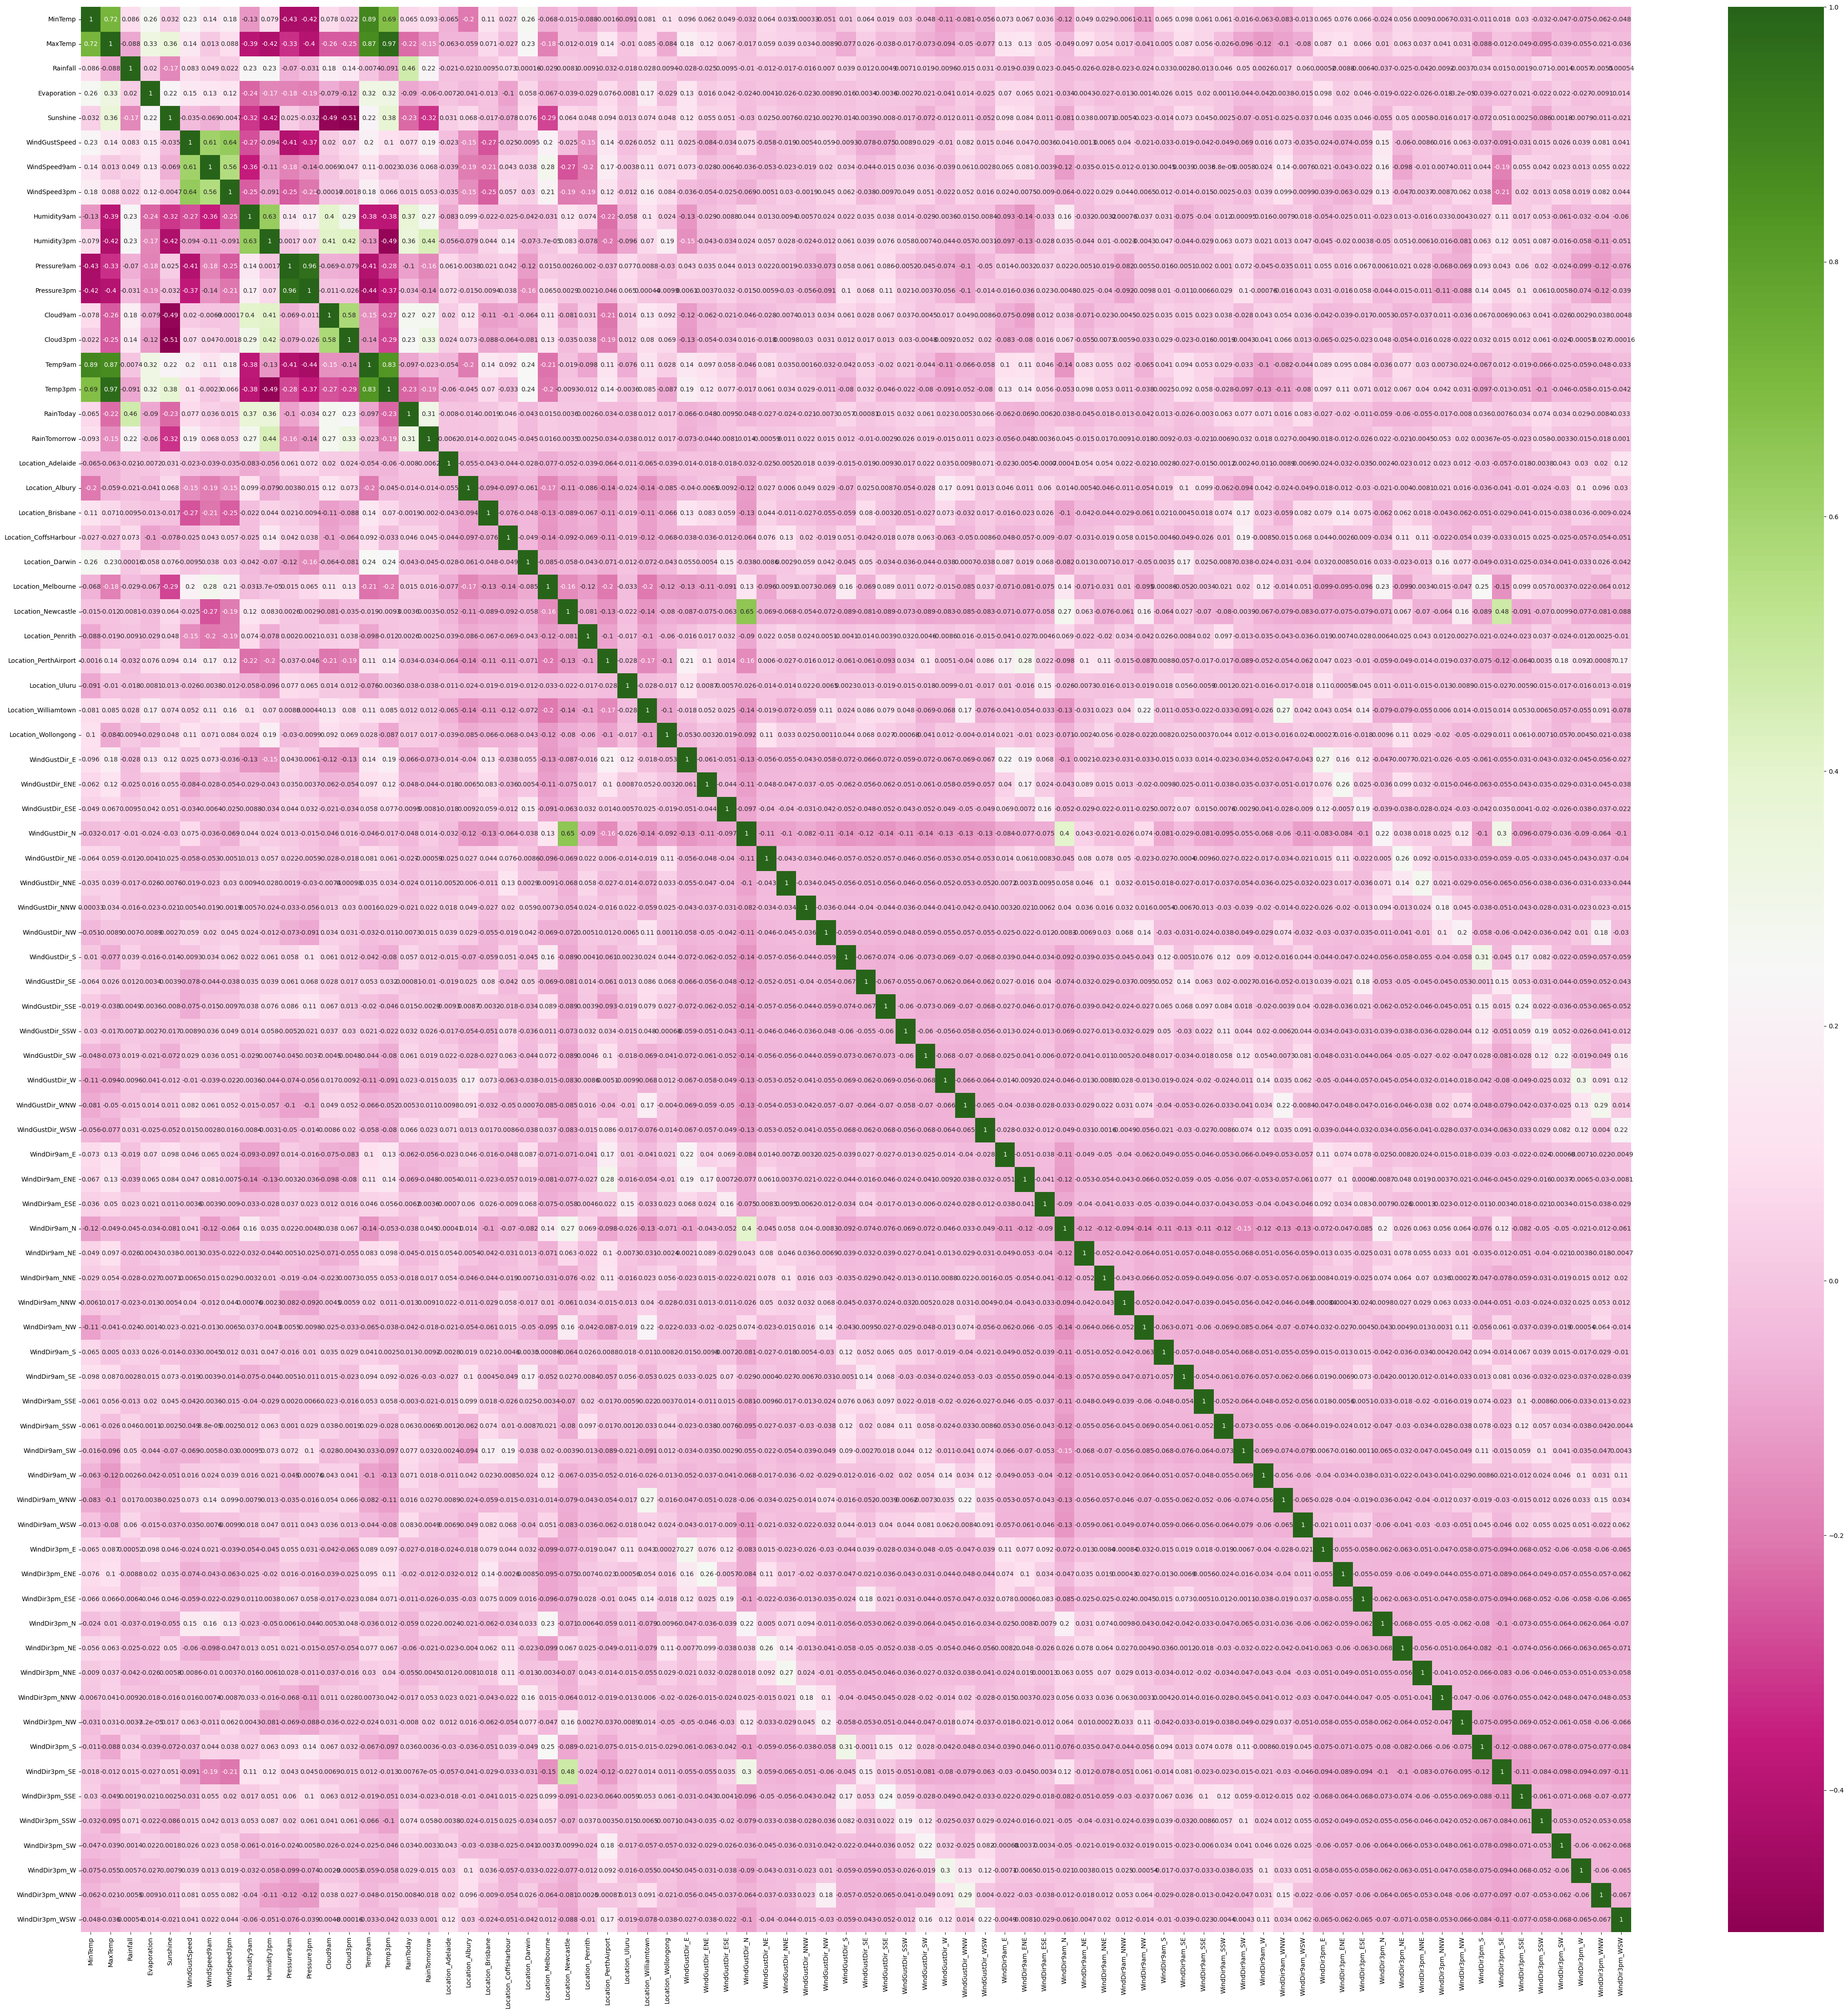

In [34]:
# Let's build a correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= rainfall_dummies.corr()
f, ax = plt.subplots(figsize=(55,55))
sns.heatmap(corrmat, annot=True, cmap='PiYG')

## 5.Model Building

In [35]:
# Extracting NumPy arrays X and y
X= rainfall_dummies.drop(["RainTomorrow"],axis =1)
y= rainfall_dummies["RainTomorrow"]
X= X.values
print(X.shape)
print(X.dtype)
X

(8425, 77)
float64


array([[13.4, 22.9,  0.6, ...,  0. ,  1. ,  0. ],
       [ 7.4, 25.1,  0. , ...,  0. ,  0. ,  1. ],
       [12.9, 25.7,  0. , ...,  0. ,  0. ,  1. ],
       ...,
       [ 5.4, 26.9,  0. , ...,  0. ,  1. ,  0. ],
       [ 7.8, 27. ,  0. , ...,  0. ,  0. ,  0. ],
       [14.9, 23.3,  0. , ...,  0. ,  0. ,  0. ]])

In [36]:
# Extracting NumPy arrays X and y
y= y.values
print(y.shape)
print(y.dtype)
y

(8425,)
int64


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
# Let's split the data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [38]:
knn = KNeighborsClassifier(n_neighbors=10)                     
tree = DecisionTreeClassifier(random_state=0)                  
rf = RandomForestClassifier(n_estimators=10, random_state=5)   
gbrt = GradientBoostingClassifier(random_state=10)             
xgbr = XGBClassifier(random_state=48)                          

In [39]:
# Preprocessing by scaling Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### KNN model

Model KNN:

1. Accuracy: 0.78
2. Precision: 0.68
3. Recall: 0.22
4. f1-measure: 0.33
5. Average Precision: 0.542


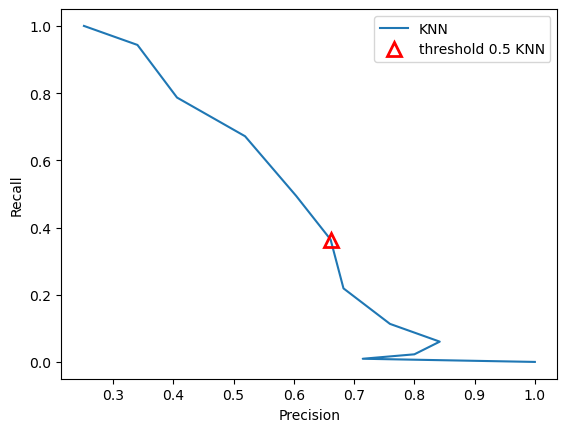

In [40]:
# Building a KNN model on scaled training data
knn.fit(X_train_scaled, y_train)
# Accuracy for a scaled test set
knn.score(X_test_scaled, y_test)
acc_Knn = knn.score(X_test_scaled, y_test)
# Model prediction on test data
pred_Knn = knn.predict(X_test_scaled)
# For Binary Classification, the most commonly used metrics are:
# 1.Accuracy, 
# 2.Precision,
# 3.Recall,
# 4.F1-measure, 
# 5.Average Precision,
# 6.Area Under Curve AUC (ROC AUC),
# 7.Confusion Matrix,
# 8.Classification Report
print("Model KNN:\n")
print("1. Accuracy: {:.2f}".format(acc_Knn))

precision_Knn = precision_score(y_test, pred_Knn)
print("2. Precision: {:.2f}".format(precision_Knn))

recall_Knn = recall_score(y_test, pred_Knn)
print("3. Recall: {:.2f}".format(recall_Knn))

print("4. f1-measure: {:.2f}".format(f1_score(y_test, pred_Knn)))

predict_proba_Knn = knn.predict_proba(X_test_scaled)[:, 1]
precision_Knn, recall_Knn, thresholds_Knn = precision_recall_curve(y_test, predict_proba_Knn)
# find the threshold closest to zero
plt.plot(precision_Knn, recall_Knn, label="KNN")
close_default_Knn = np.argmin(np.abs(thresholds_Knn - 0.5))
plt.plot(precision_Knn[close_default_Knn], recall_Knn[close_default_Knn], '^', c='r', markersize=10, label="threshold 0.5 KNN", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_Knn = average_precision_score(y_test, predict_proba_Knn)
print("5. Average Precision: {:.3f}".format(ap_Knn))

6. ROC AUC: 0.792
7. Confusion matrix:
[[1523   54]
 [ 414  116]]
8. Classification Report:
                   precision    recall  f1-score   support

No RainTomorrow       0.79      0.97      0.87      1577
   RainTomorrow       0.68      0.22      0.33       530

       accuracy                           0.78      2107
      macro avg       0.73      0.59      0.60      2107
   weighted avg       0.76      0.78      0.73      2107



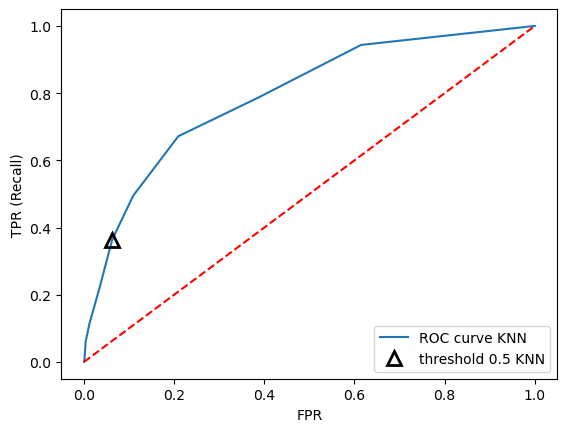

In [41]:
fpr_Knn, tpr_Knn, thresholds_Knn = roc_curve(y_test, predict_proba_Knn)
plt.plot(fpr_Knn, tpr_Knn, label="ROC curve KNN")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
close_default_Knn = np.argmin(np.abs(thresholds_Knn - 0.5))
plt.plot(fpr_Knn[close_default_Knn], tpr_Knn[close_default_Knn], '^', markersize=10, label="threshold 0.5 KNN", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
roc_auc_Knn = roc_auc_score(y_test, predict_proba_Knn)
print("6. ROC AUC: {:.3f}".format(roc_auc_Knn))

confusion = confusion_matrix(y_test, pred_Knn)
print("7. Confusion matrix:\n{}".format(confusion))

print("8. Classification Report:\n ", classification_report(y_test, pred_Knn, target_names=["No RainTomorrow", "RainTomorrow"]))

### DecisionTree model

Model DecisionTree:

1. Accuracy: 0.84
2. Precision: 0.70
3. Recall: 0.66
4. f1-measure: 0.68
5. Average Precision: 0.547


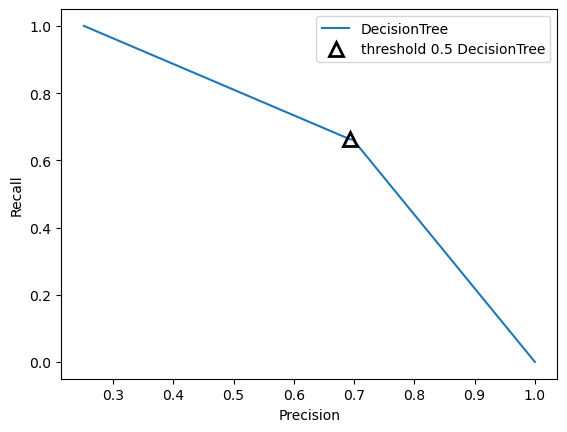

In [42]:
# Building a DecisionTree model on scaled training data
tree.fit(X_train_scaled, y_train)
# Accuracy for a scaled test set
tree.score(X_test_scaled, y_test)
acc_tree = tree.score(X_test_scaled, y_test)
# Model prediction on test data
pred_tree = tree.predict(X_test_scaled)

print("Model DecisionTree:\n")
print("1. Accuracy: {:.2f}".format(acc_tree))

precision_tree = precision_score(y_test, pred_tree)
print("2. Precision: {:.2f}".format(precision_tree))

recall_tree = recall_score(y_test, pred_tree)
print("3. Recall: {:.2f}".format(recall_tree))

print("4. f1-measure: {:.2f}".format(f1_score(y_test, pred_tree)))

predict_proba_tree = tree.predict_proba(X_test_scaled)[:, 1]
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test, predict_proba_tree)

# find the threshold closest to zero
plt.plot(precision_tree, recall_tree, label="DecisionTree")
close_default_tree = np.argmin(np.abs(thresholds_tree - 0.5))
plt.plot(precision_tree[close_default_tree], recall_tree[close_default_tree], '^', c='k', markersize=10, label="threshold 0.5 DecisionTree", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_tree = average_precision_score(y_test, predict_proba_tree)
print("5. Average Precision: {:.3f}".format(ap_tree))

6. ROC AUC: 0.783
7. Confusion matrix:
[[1425  152]
 [ 179  351]]
8. Classification Report:
                   precision    recall  f1-score   support

No RainTomorrow       0.89      0.90      0.90      1577
   RainTomorrow       0.70      0.66      0.68       530

       accuracy                           0.84      2107
      macro avg       0.79      0.78      0.79      2107
   weighted avg       0.84      0.84      0.84      2107



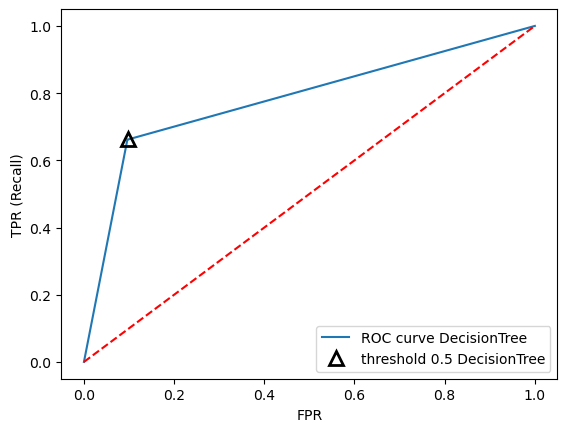

In [43]:
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, predict_proba_tree)
plt.plot(fpr_tree, tpr_tree, label="ROC curve DecisionTree")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
close_default_tree = np.argmin(np.abs(thresholds_tree - 0.5))
plt.plot(fpr_tree[close_default_tree], tpr_tree[close_default_tree], '^', markersize=10, label="threshold 0.5 DecisionTree", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
roc_auc_tree = roc_auc_score(y_test, predict_proba_tree)
print("6. ROC AUC: {:.3f}".format(roc_auc_tree))

confusion = confusion_matrix(y_test, pred_tree)
print("7. Confusion matrix:\n{}".format(confusion))

print("8. Classification Report:\n ", classification_report(y_test, pred_tree, target_names=["No RainTomorrow", "RainTomorrow"]))

### RandomForest model

Model RandomForest:

1. Accuracy: 0.87
2. Precision: 0.86
3. Recall: 0.57
4. f1-measure: 0.68
5. Average Precision: 0.758


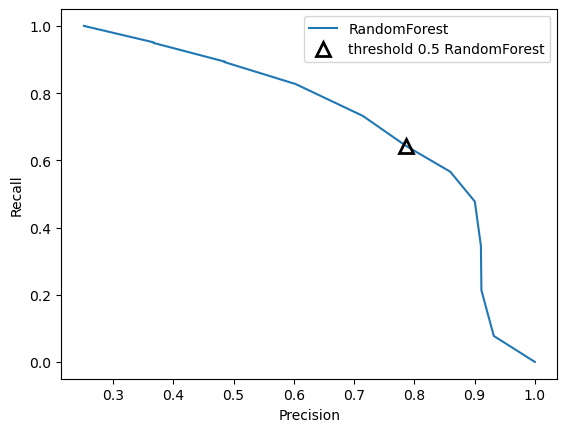

In [44]:
# Building a RandomForest model on scaled training data
rf.fit(X_train_scaled, y_train)
# Accuracy for a scaled test set
rf.score(X_test_scaled, y_test)
acc_rf = rf.score(X_test_scaled, y_test)
# Model prediction on test data
pred_rf = rf.predict(X_test_scaled)

print("Model RandomForest:\n")
print("1. Accuracy: {:.2f}".format(acc_rf))

precision_rf = precision_score(y_test, pred_rf)
print("2. Precision: {:.2f}".format(precision_rf))

recall_rf = recall_score(y_test, pred_rf)
print("3. Recall: {:.2f}".format(recall_rf))

print("4. f1-measure: {:.2f}".format(f1_score(y_test, pred_rf)))

predict_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, predict_proba_rf)
# find the threshold closest to zero
plt.plot(precision_rf, recall_rf, label="RandomForest")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', markersize=10, label="threshold 0.5 RandomForest", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_rf = average_precision_score(y_test, predict_proba_rf)
print("5. Average Precision: {:.3f}".format(ap_rf))

6. ROC AUC: 0.890
7. Confusion matrix:
[[1528   49]
 [ 230  300]]
8. Classification Report:
                   precision    recall  f1-score   support

No RainTomorrow       0.87      0.97      0.92      1577
   RainTomorrow       0.86      0.57      0.68       530

       accuracy                           0.87      2107
      macro avg       0.86      0.77      0.80      2107
   weighted avg       0.87      0.87      0.86      2107



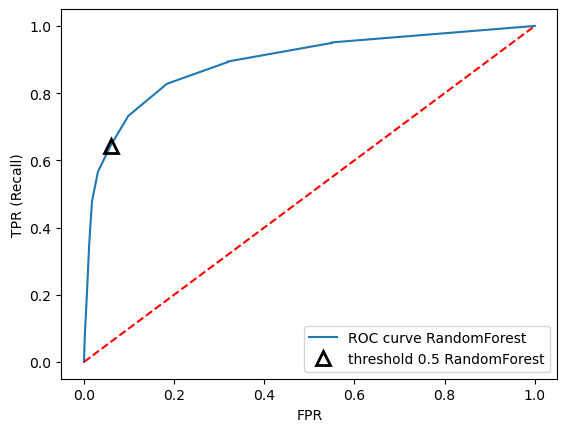

In [45]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, predict_proba_rf)
plt.plot(fpr_rf, tpr_rf, label="ROC curve RandomForest")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10, label="threshold 0.5 RandomForest", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
roc_auc_rf = roc_auc_score(y_test, predict_proba_rf)
print("6. ROC AUC: {:.3f}".format(roc_auc_rf))

confusion = confusion_matrix(y_test, pred_rf)
print("7. Confusion matrix:\n{}".format(confusion))

print("8. Classification Report:\n ", classification_report(y_test, pred_rf, target_names=["No RainTomorrow", "RainTomorrow"]))

### GradientBoosting model

Model GradientBoosting:

1. Accuracy: 0.84
2. Precision: 0.76
3. Recall: 0.53
4. f1-measure: 0.62
5. Average Precision: 0.746


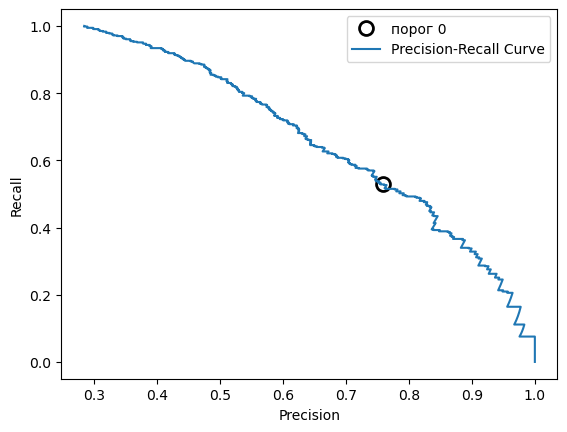

In [46]:
# Building a GradientBoosting model on scaled training data
gbrt.fit(X_train_scaled, y_train)
# Accuracy for a scaled test set
gbrt.score(X_test_scaled, y_test)
acc_gbrt = gbrt.score(X_test_scaled, y_test)
# Model prediction on test data
pred_gbrt = gbrt.predict(X_test_scaled)

print("Model GradientBoosting:\n")
print("1. Accuracy: {:.2f}".format(acc_gbrt))

precision_gbrt = precision_score(y_test, pred_gbrt)
print("2. Precision: {:.2f}".format(precision_gbrt))

recall_gbrt = recall_score(y_test, pred_gbrt)
print("3. Recall: {:.2f}".format(recall_gbrt))

print("4. f1-measure: {:.2f}".format(f1_score(y_test, pred_gbrt)))

decision_function_gbrt = gbrt.decision_function(X_test_scaled)
precision_gbrt, recall_gbrt, thresholds_gbrt = precision_recall_curve(y_test, decision_function_gbrt)

# find the threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_gbrt))
plt.plot(precision_gbrt[close_zero], recall_gbrt[close_zero], 'o', markersize=10, label="порог 0", fillstyle="none", c='k', mew=2)
plt.plot(precision_gbrt, recall_gbrt, label="Precision-Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")


ap_gbrt = average_precision_score(y_test, decision_function_gbrt)
print("5. Average Precision: {:.3f}".format(ap_gbrt))

6. ROC AUC: 0.872
7. Confusion matrix:
[[1488   89]
 [ 250  280]]
8. Classification Report:
                   precision    recall  f1-score   support

No RainTomorrow       0.86      0.94      0.90      1577
   RainTomorrow       0.76      0.53      0.62       530

       accuracy                           0.84      2107
      macro avg       0.81      0.74      0.76      2107
   weighted avg       0.83      0.84      0.83      2107



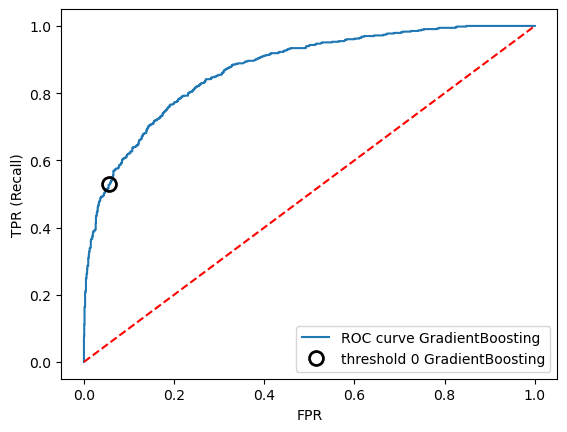

In [47]:
fpr_gbrt, tpr_gbrt, thresholds_gbrt = roc_curve(y_test, decision_function_gbrt)
plt.plot(fpr_gbrt, tpr_gbrt, label="ROC curve GradientBoosting")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
close_zero = np.argmin(np.abs(thresholds_gbrt))
plt.plot(fpr_gbrt[close_zero], tpr_gbrt[close_zero], 'o', markersize=10, label="threshold 0 GradientBoosting", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
roc_auc_gbrt = roc_auc_score(y_test, decision_function_gbrt)
print("6. ROC AUC: {:.3f}".format(roc_auc_gbrt))

confusion = confusion_matrix(y_test, pred_gbrt)
print("7. Confusion matrix:\n{}".format(confusion))

print("8. Classification Report:\n ", classification_report(y_test, pred_gbrt, target_names=["No RainTomorrow", "RainTomorrow"]))

### XGB model

Model XGB:

1. Accuracy: 0.88
2. Precision: 0.84
3. Recall: 0.66
4. f1-measure: 0.74
5. Average Precision: 0.820


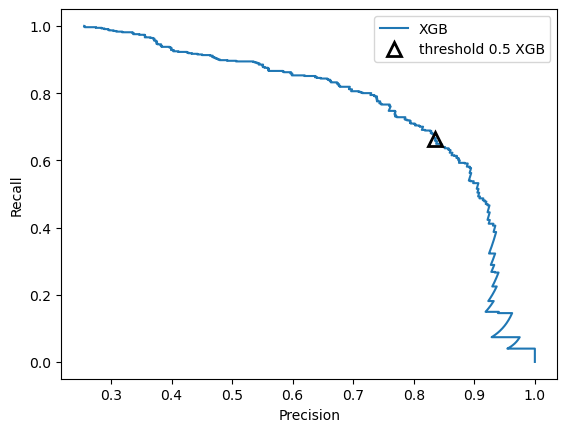

In [48]:
# Building a XGB model on scaled training data
xgbr.fit(X_train_scaled, y_train)
# Accuracy for a scaled test set
xgbr.score(X_test_scaled, y_test)
acc_xgbr = xgbr.score(X_test_scaled, y_test)
# Model prediction on test data
pred_xgbr = xgbr.predict(X_test_scaled)

print("Model XGB:\n")
print("1. Accuracy: {:.2f}".format(acc_xgbr))

precision_xgbr = precision_score(y_test, pred_xgbr)
print("2. Precision: {:.2f}".format(precision_xgbr))

recall_xgbr = recall_score(y_test, pred_xgbr)
print("3. Recall: {:.2f}".format(recall_xgbr))

print("4. f1-measure: {:.2f}".format(f1_score(y_test, pred_xgbr)))

predict_proba_xgbr = xgbr.predict_proba(X_test_scaled)[:, 1]
precision_xgbr, recall_xgbr, thresholds_xgbr = precision_recall_curve(y_test, predict_proba_xgbr)
# find the threshold closest to zero
plt.plot(precision_xgbr, recall_xgbr, label="XGB")
close_default_xgbr = np.argmin(np.abs(thresholds_xgbr - 0.5))
plt.plot(precision_xgbr[close_default_xgbr], recall_xgbr[close_default_xgbr], '^', c='k', markersize=10, label="threshold 0.5 XGB", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_xgbr = average_precision_score(y_test, predict_proba_xgbr)
print("5. Average Precision: {:.3f}".format(ap_xgbr))

6. ROC AUC: 0.909
7. Confusion matrix:
[[1508   69]
 [ 180  350]]
8. Classification Report:
                   precision    recall  f1-score   support

No RainTomorrow       0.89      0.96      0.92      1577
   RainTomorrow       0.84      0.66      0.74       530

       accuracy                           0.88      2107
      macro avg       0.86      0.81      0.83      2107
   weighted avg       0.88      0.88      0.88      2107



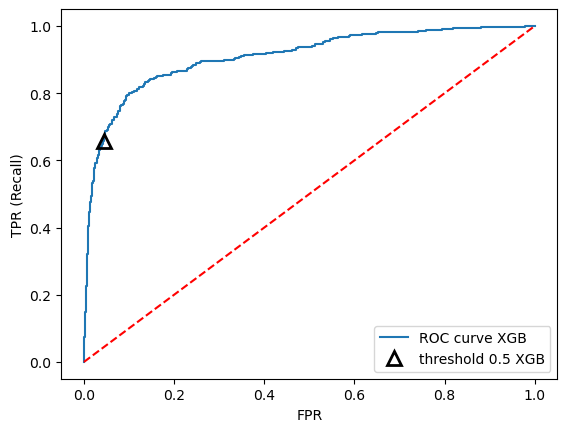

In [49]:
fpr_xgbr, tpr_xgbr, thresholds_xgbr = roc_curve(y_test, predict_proba_xgbr)
plt.plot(fpr_xgbr, tpr_xgbr, label="ROC curve XGB")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
close_default_xgbr = np.argmin(np.abs(thresholds_xgbr - 0.5))
plt.plot(fpr_xgbr[close_default_xgbr], tpr_xgbr[close_default_xgbr], '^', markersize=10, label="threshold 0.5 XGB", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
roc_auc_xgbr = roc_auc_score(y_test, predict_proba_xgbr)
print("6. ROC AUC: {:.3f}".format(roc_auc_xgbr))

confusion = confusion_matrix(y_test, pred_xgbr)
print("7. Confusion matrix:\n{}".format(confusion))

print("8. Classification Report:\n ", classification_report(y_test, pred_xgbr, target_names=["No RainTomorrow", "RainTomorrow"]))

## 6.Model Evaluation

In [50]:
models_acc = pd.DataFrame({
    'Model': ['KNeighbors', 'DecisionTree', 'RandomForest', 
              'GradientBoosting', 'XGB'],
    'Accuracy': [acc_Knn, acc_tree, acc_rf, acc_gbrt, acc_xgbr]})
models_acc.sort_values(by='Accuracy', ascending=False)

Model  Accuracy
4               XGB  0.881822
2      RandomForest  0.867584
1      DecisionTree  0.842905
3  GradientBoosting  0.839108
0        KNeighbors  0.777883

In [52]:
models_ROC_AUC = pd.DataFrame({
    'Model': ['KNeighbors', 'DecisionTree', 'RandomForest', 
              'GradientBoosting', 'XGB'],
    'ROC_AUC': [roc_auc_Knn, roc_auc_tree, roc_auc_rf, roc_auc_gbrt, roc_auc_xgbr]})
models_ROC_AUC.sort_values(by='ROC_AUC', ascending=False)

Model   ROC_AUC
4               XGB  0.909148
2      RandomForest  0.890365
3  GradientBoosting  0.872429
0        KNeighbors  0.792143
1      DecisionTree  0.782618

In [53]:
import joblib
joblib.dump(Final_mod,'rainfall_Final.pkl')

NameError: name 'Final_mod' is not defined